In [1]:
import pandas as pd
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
Phishing_Data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Since DBSCAN struggles with high dimensional datasets, it is best to reduce the dataset to its top 10 features based on feature importance as calculated in the Week 9 Juypter NoteBook. 

In [6]:
pip install kDBCV

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from kDBCV import DBCV_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



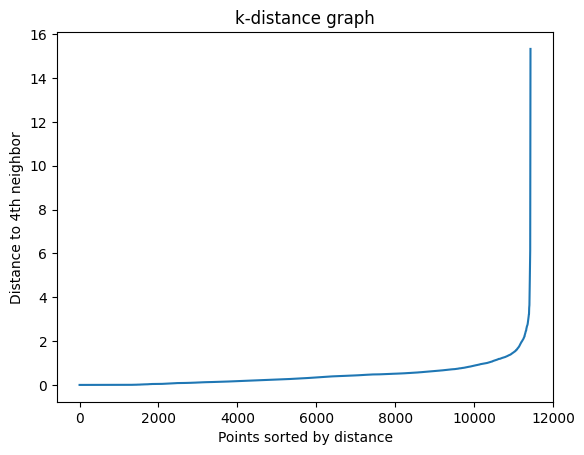

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th neighbor")
plt.show()

There is no clear elbow but there is a sharp rise at y = 2. Let's use that as epsilon and see what happens. 

In [9]:
dbscan = DBSCAN(eps=2,min_samples=4)
cluster_labels = dbscan.fit_predict(X_scaled)
dbcv = DBCV_score(X_scaled, cluster_labels)
print(f"DBCV Score: {dbcv[0]:.3f}")


DBCV Score: -0.286


This is very low. Lets try with Min Pts 4, 5, 6, 7, 8, 9, and 10. 

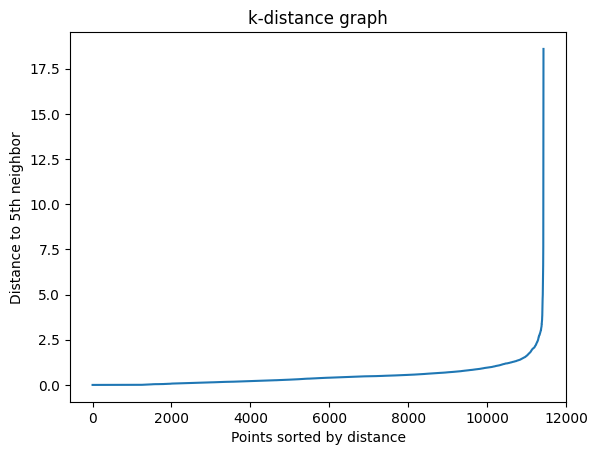

In [12]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th neighbor")
plt.show()

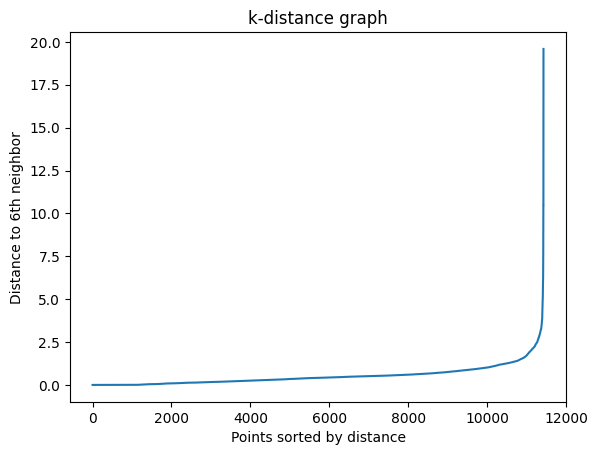

In [13]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 6th neighbor")
plt.show()

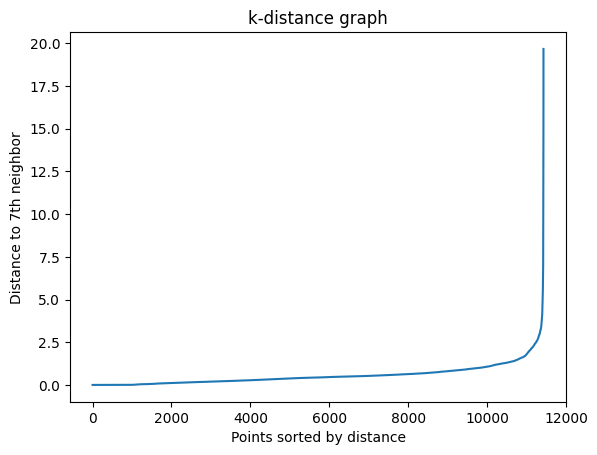

In [14]:
neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 7th neighbor")
plt.show()

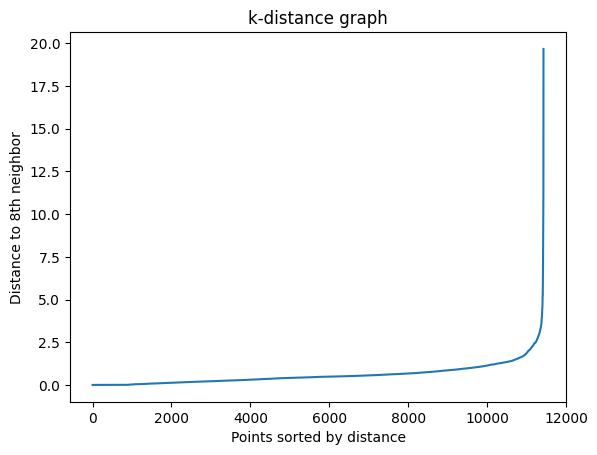

In [15]:
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 8th neighbor")
plt.show()

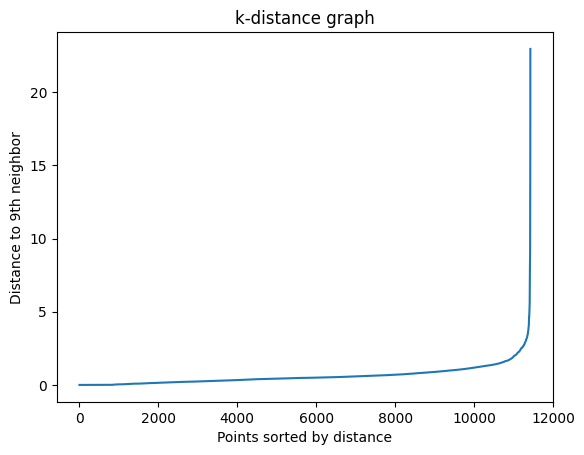

In [16]:
neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 9th neighbor")
plt.show()

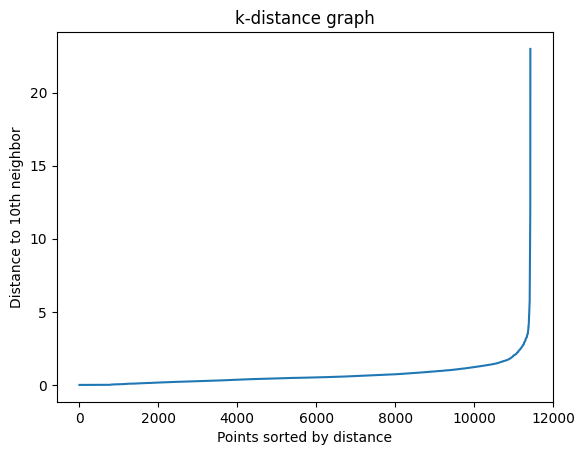

In [17]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 10th neighbor")
plt.show()

In [18]:
for s in [5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=2,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        dbcv = DBCV_score(X_scaled, cluster_labels)
        print(f"DBCV Score: {dbcv[0]:.3f}")


DBCV Score: -0.359
DBCV Score: -0.388
DBCV Score: -0.308
DBCV Score: -0.206
DBCV Score: -0.286
DBCV Score: -0.287


These values are all negative which is not good. Let's see what happens when we choose the least negative value among them with its parameters. 

In [19]:
dbscan = DBSCAN(eps=2,min_samples=8)
cluster_labels = dbscan.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5
status,,,,,,,
legitimate,59,898,44,4582,132,0,0
phishing,184,3911,1058,398,141,13,10


The outliers are mostly phishing and all clusters aside from cluster 2 are mostly phishing. There is quite a bit of separability between the classes here. However, given the low DBCV score in the negatives, this can't really be trusted. 

In [20]:
import pandas as pd
Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
Email.head()

,Unnamed: 0,Email Text,Email Type,num_chars,num_words,avg_word_len,num_sentences,num_capitals,num_exclamations,num_question_marks,num_special_chars,num_digits,num_urls
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030.0,230.0,3.482609,9.0,0.0,2.0,0.0,59.0,9.0,0.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479.0,91.0,4.274725,6.0,0.0,0.0,2.0,16.0,0.0,0.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245.0,305.0,3.085246,7.0,0.0,0.0,1.0,95.0,63.0,0.0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688.0,96.0,5.500000,38.0,39.0,1.0,1.0,110.0,29.0,1.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441.0,91.0,3.857143,13.0,0.0,0.0,0.0,27.0,2.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

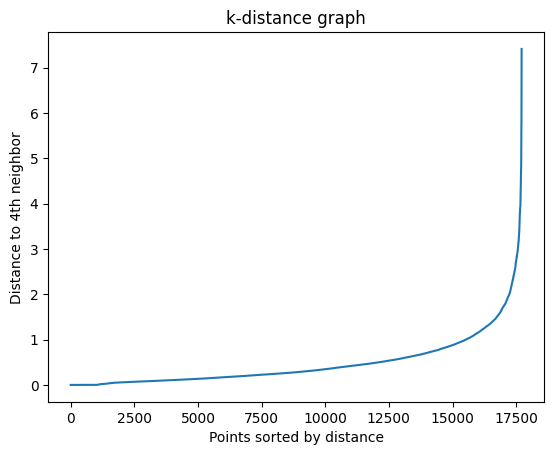

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th neighbor")
plt.show()

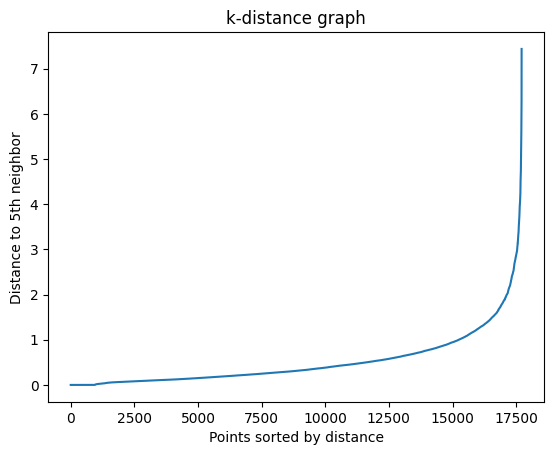

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th neighbor")
plt.show()

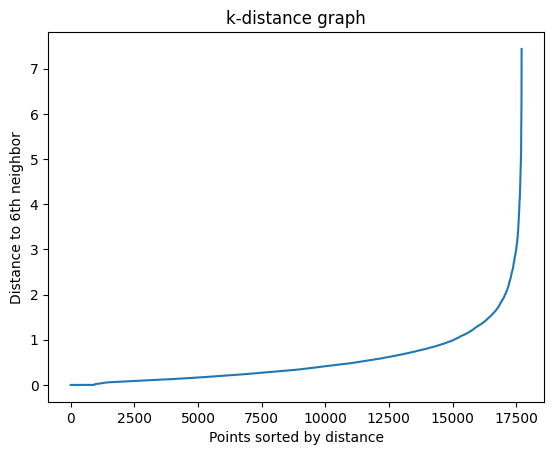

In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 6th neighbor")
plt.show()

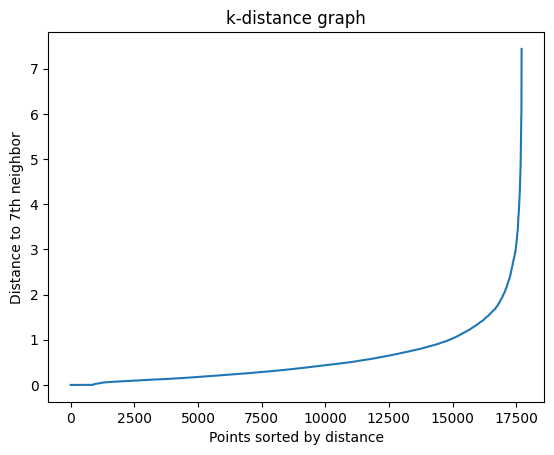

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 7th neighbor")
plt.show()

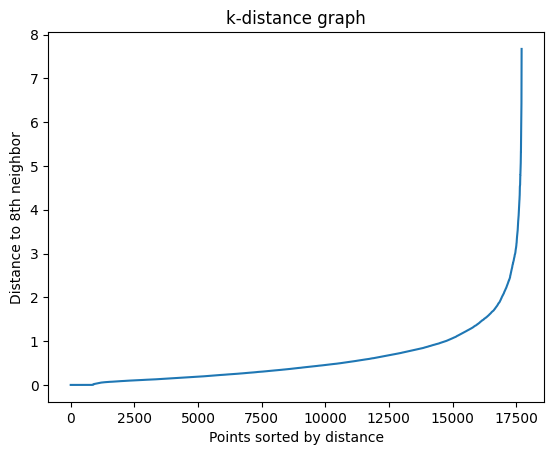

In [26]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 8th neighbor")
plt.show()

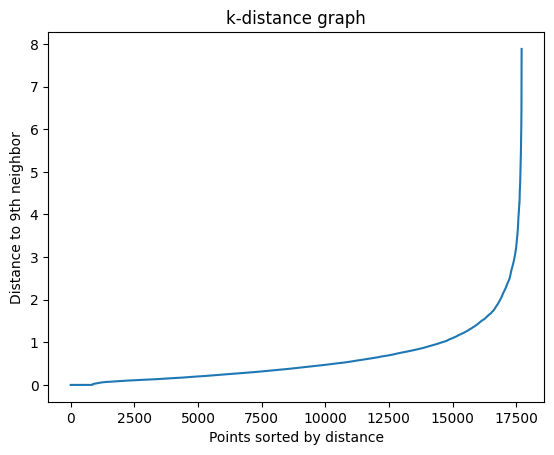

In [27]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 9th neighbor")
plt.show()

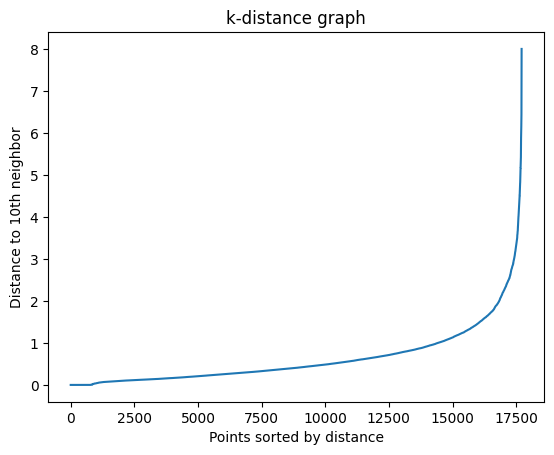

In [28]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 10th neighbor")
plt.show()

In [30]:
for s in [4,5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=1,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        dbcv = DBCV_score(X_scaled, cluster_labels)
        print(f"DBCV Score: {dbcv[0]:.3f}")


DBCV Score: -0.443
DBCV Score: -0.398
DBCV Score: -0.390
DBCV Score: -0.382
DBCV Score: -0.380
DBCV Score: -0.380
DBCV Score: -0.401


None of these scores are good but let's choose the greatest value with its corresponding parameters and see what happens. 

In [32]:
dbscan = DBSCAN(eps=1,min_samples=8)
cluster_labels = dbscan.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Email Type,,,,,,,,,,,,,,,,,,
Phishing Email,901,5636,144,96,78,8,11,10,13,13,14,10,9,10,5,0,10,10
Safe Email,1393,6898,1365,701,282,2,0,0,5,77,0,0,1,0,2,12,0,0


Outliers are mostly safe emails. Most emails are in cluster 0. Some clusters such as 4,5,6, and 7 are entirely or almost entirely phishing, indicating some separability. However, this result can't be trusted because of the low DBCV score. 

In [33]:
import pandas as pd
URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
URL = URL.head(10000)
X = URL.drop("phishing",axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



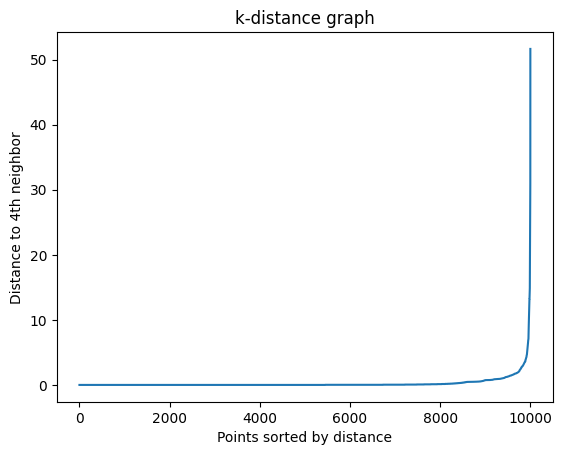

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th neighbor")
plt.show()

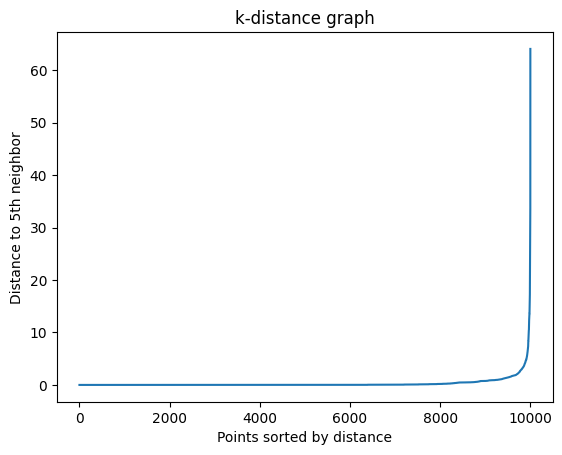

In [38]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th neighbor")
plt.show()

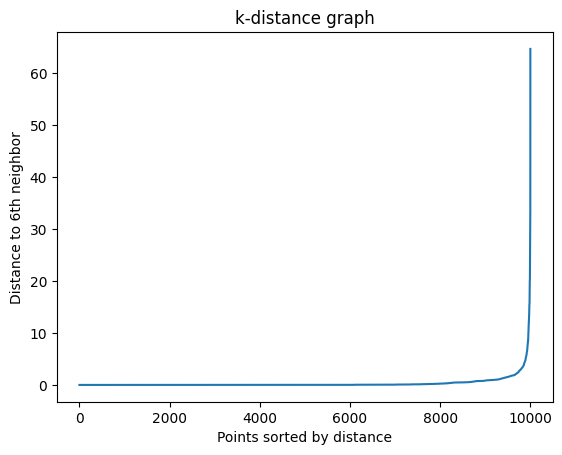

In [39]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 6th neighbor")
plt.show()

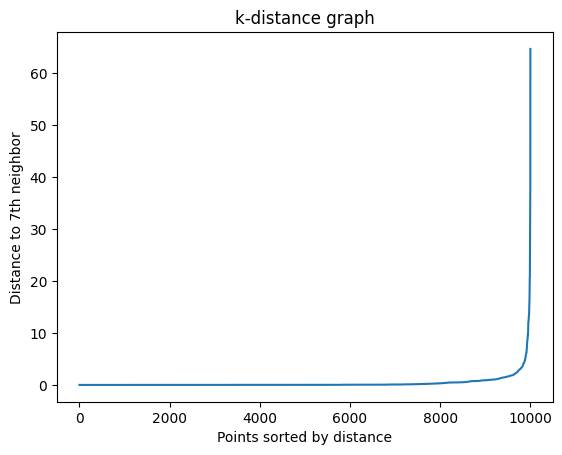

In [40]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 7th neighbor")
plt.show()

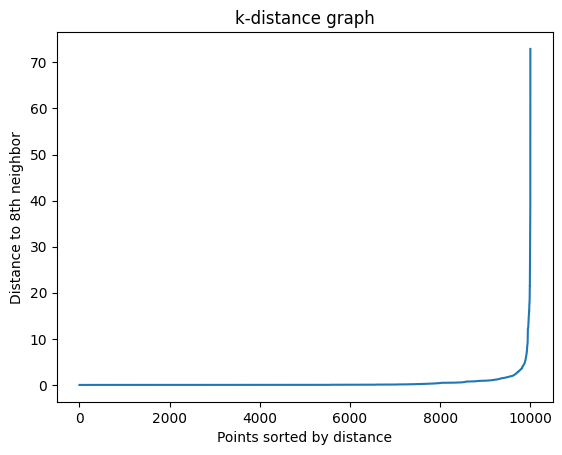

In [41]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 8th neighbor")
plt.show()

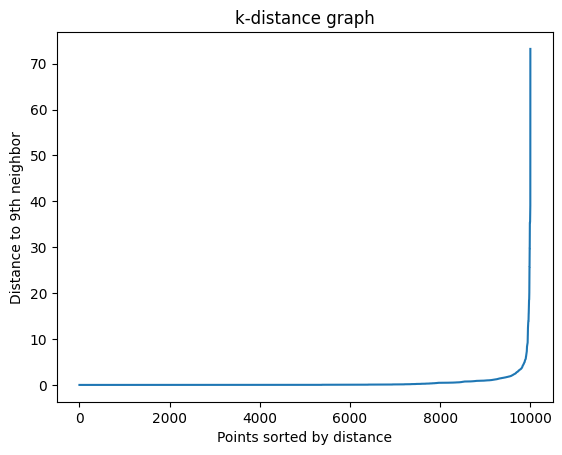

In [42]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 9th neighbor")
plt.show()

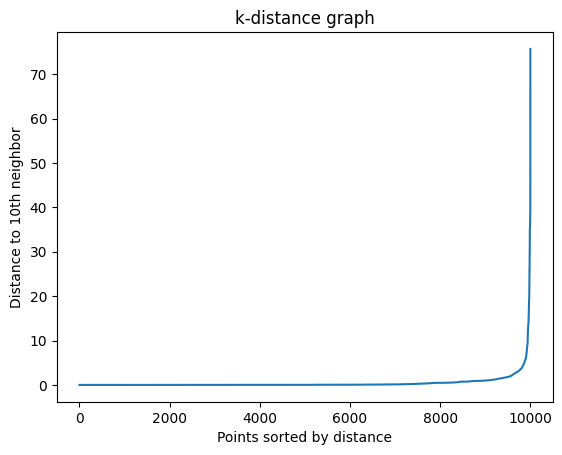

In [43]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 10th neighbor")
plt.show()

In [49]:
for s in [4,5,6,7,8,9,10]:
        dbscan = DBSCAN(eps=2,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        dbcv = DBCV_score(X_scaled, cluster_labels)
        print(f"DBCV Score: {dbcv[0]:.3f}")

DBCV Score: 0.258
DBCV Score: 0.259
DBCV Score: 0.257
DBCV Score: 0.291
DBCV Score: 0.290
DBCV Score: 0.289
DBCV Score: 0.288


All the scores are positive which is good news. However, they are on the lower side of positive. Let's choose the highest score and its corresponding parameters. 

In [50]:
dbscan = DBSCAN(eps=2,min_samples=7)
cluster_labels = dbscan.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
phishing,,,,,,,,,,,,,,,,,,
0,53,4704,134,0,0,0,2,44,6,17,9,0,0,16,0,0,0,5
1,243,3627,809,17,119,37,31,22,3,39,8,14,9,7,7,8,8,2


Most points are in cluster 0. Outliers are mostly phishing and most clusters aside from Cluster 0, 6, 9, 12, and 16 are mostly or completely phishing. There is some separability here but given the low DBCV score, this can't be fully trusted. It is good the DBCV score is not negative like for the other two datasets but it is still on the lower end.  

In [ ]:
import pandas as pd
import numpy as np
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram, cophenet
from scipy.spatial.distance import pdist
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
original_distances = pdist(X_scaled)
Z = linkage(X_scaled, method='ward')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")





Cophenetic Correlation Coefficient: 0.3745294219559969


This is a poor score that doesn't say anything good about dendrogram quality. Let's try single linkage. 

In [2]:
Z = linkage(X_scaled, method='single')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.6375904407690255


This is much better. Let's try complete. 

In [3]:
Z = linkage(X_scaled, method='complete')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.7237080152096851


Even better. Let's try average linkage now. 

In [4]:
Z = linkage(X_scaled, method='average')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.8483633681452054


Average linkage gives the best result. This means that the denodrogram is most reflective of the real structure in data. Let's reveal the dendrogam now. 

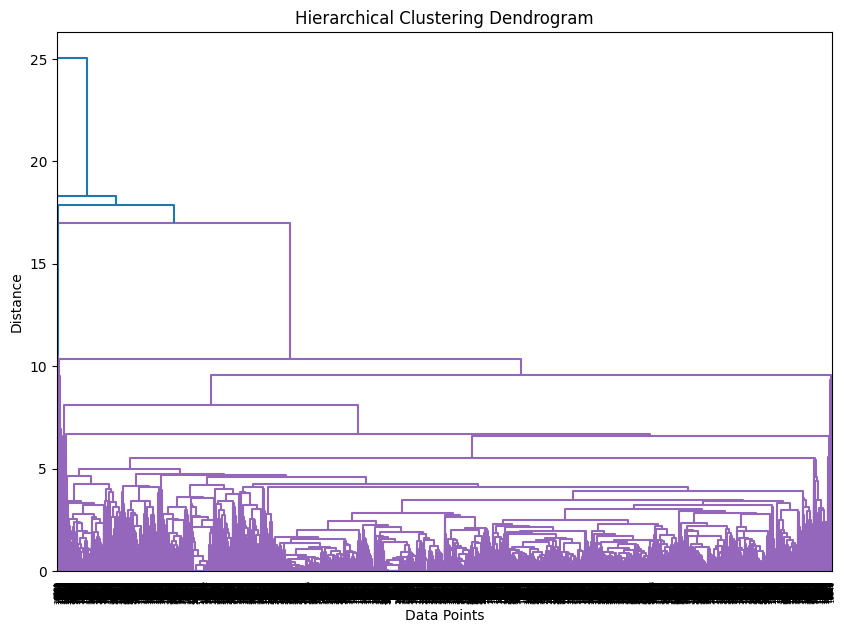

In [5]:
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 7)) # Optional: set figure size
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dendrogram(linkage_matrix)
plt.show()

The structure is rather bizarre. But it looks like two clusters can be formed at the very least. Let's try to now use silhoutte score to get the best number of clusters. 

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for c in range(2,10):
    clustering = AgglomerativeClustering(n_clusters=c,linkage='average')
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for number of clusters {c}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2: 0.837
Silhouette Score for number of clusters 3: 0.777
Silhouette Score for number of clusters 4: 0.768
Silhouette Score for number of clusters 5: 0.753
Silhouette Score for number of clusters 6: 0.752
Silhouette Score for number of clusters 7: 0.731
Silhouette Score for number of clusters 8: 0.614
Silhouette Score for number of clusters 9: 0.581


2 clusters gives us the best silhouette score. Let's go with that. 

In [9]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="average")
cluster_labels = clustering.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,0,1
status,,
legitimate,5715,0
phishing,5711,4


Basically, almost all data points are in one giant cluster with a handful, all phishing urls, being in the other one. This is not really a good sign since it shows next to no separability between the classes. But this does reflect the strange structure of the dendrogram seen above. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
original_distances = pdist(X_scaled)
Z = linkage(X_scaled, method='ward')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")


Cophenetic Correlation Coefficient: 0.6972664599396653


In [11]:
Z = linkage(X_scaled, method='single')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.801806604527047


In [12]:
Z = linkage(X_scaled, method='complete')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.8511276241272255


In [13]:
Z = linkage(X_scaled, method='average')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.8996335848607897


Average wins again. Now, it is time to create the dendrogram. 

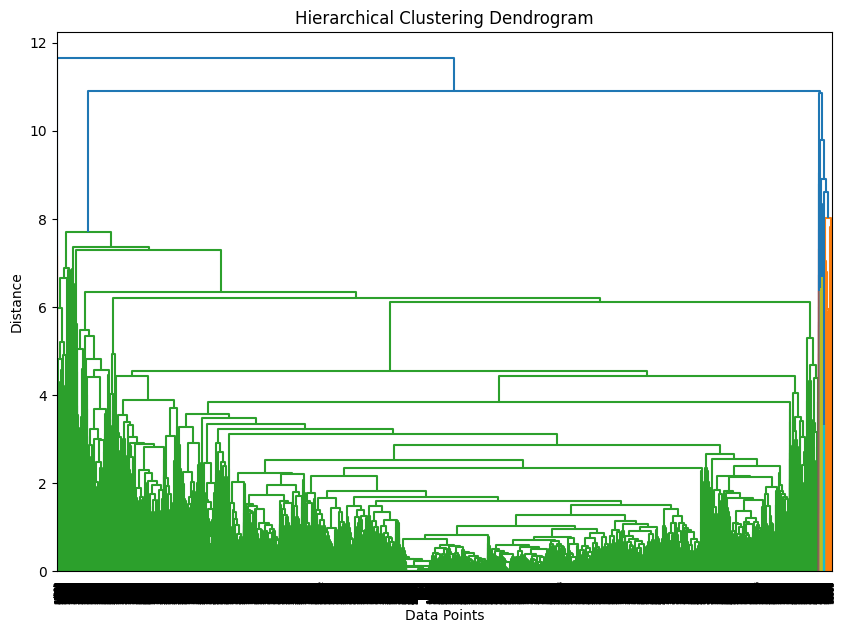

In [14]:
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 7)) 
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dendrogram(linkage_matrix)
plt.show()

Based on this, we can go with at least 2 clusters. Let's now use silhouette score now to determine what is the best number of clusters. 

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for c in range(2,10):
    clustering = AgglomerativeClustering(n_clusters=c,linkage='average')
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for number of clusters {c}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2: 0.676
Silhouette Score for number of clusters 3: 0.660
Silhouette Score for number of clusters 4: 0.654
Silhouette Score for number of clusters 5: 0.650
Silhouette Score for number of clusters 6: 0.627
Silhouette Score for number of clusters 7: 0.624
Silhouette Score for number of clusters 8: 0.619
Silhouette Score for number of clusters 9: 0.619


2 clusters gives us the best silhouette score. Let's go with that. 

In [18]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="average")
cluster_labels = clustering.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,0,1
Email Type,,
Phishing Email,6970,8
Safe Email,10737,1


While the second cluster is mostly phishing, it is very tiny; almost all other emails are in the giant first cluster. This indicates next to no separability. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL = URL.head(10000)
X = URL.drop("phishing",axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
original_distances = pdist(X_scaled)
Z = linkage(X_scaled, method='ward')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")


Cophenetic Correlation Coefficient: 0.5551077748167339


In [20]:
Z = linkage(X_scaled, method='single')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.8522680504878776


In [21]:
Z = linkage(X_scaled, method='complete')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.8222956673650862


In [23]:
Z = linkage(X_scaled, method='average')
cophenetic_correlation, cophenetic_distances = cophenet(Z, original_distances)
print(f"Cophenetic Correlation Coefficient: {cophenetic_correlation}")

Cophenetic Correlation Coefficient: 0.9646502413050745


Average wins yet again. Lets now create the dendrogram. 

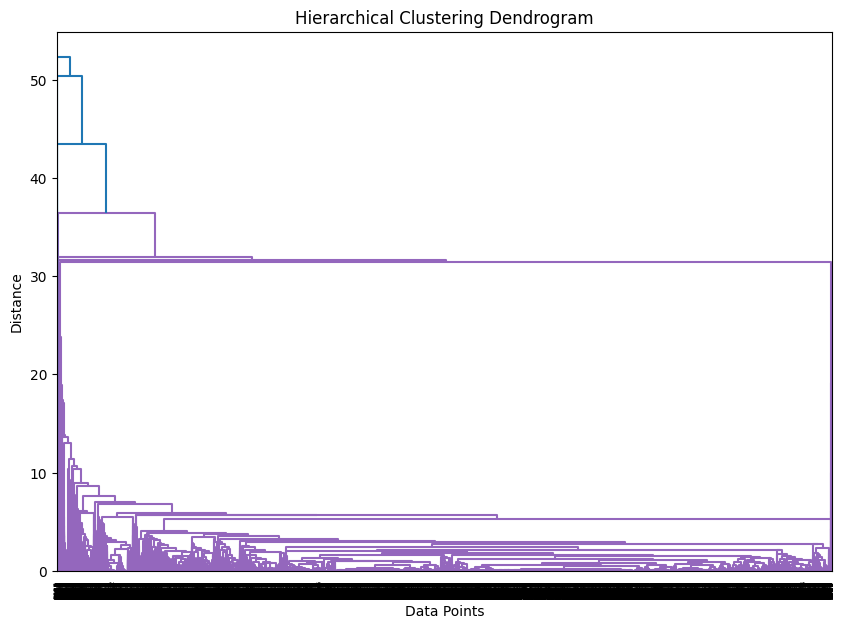

In [24]:
linkage_matrix = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 7)) 
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dendrogram(linkage_matrix)
plt.show()

We can create at least two clusters. Let's do that. 

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for c in range(2,10):
    clustering = AgglomerativeClustering(n_clusters=c,linkage='average')
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for number of clusters {c}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2: 0.932
Silhouette Score for number of clusters 3: 0.930
Silhouette Score for number of clusters 4: 0.917
Silhouette Score for number of clusters 5: 0.911
Silhouette Score for number of clusters 6: 0.904
Silhouette Score for number of clusters 7: 0.891
Silhouette Score for number of clusters 8: 0.889
Silhouette Score for number of clusters 9: 0.890


2 clusters give us the  best silhouette score. Let's go with it. 

In [27]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="average")
cluster_labels = clustering.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,0,1
phishing,,
0,4990,0
1,5007,3


Just like with the other datasets, almost all data points are in one giant cluster. The second tiny cluster is almost entirely phishing. There is clearly no separability since even the first giant cluster has a slight phishing majority. Overall, it looks as if HAC is not very suitable for finding significant insights regarding any of the three datasets. 